# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [127]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [129]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Get the unique Mouse IDs that have duplicates
# Get the unique Mouse IDs that have duplicates
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
print(duplicate_mouse_ids)

['g989']


In [131]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [135]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [137]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
num_mice_clean

248

## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tomur Volume Variance',
    'std': 'Tumor Volume Std Dev',
    'sem': 'Tumor Volume Std.Err'  # Standard Error of the Mean
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tomur Volume Variance,Tumor Volume Std Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [142]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Print the resulting DataFrame
summary_stats.style.set_caption("Tumor Volume (mm3)")

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

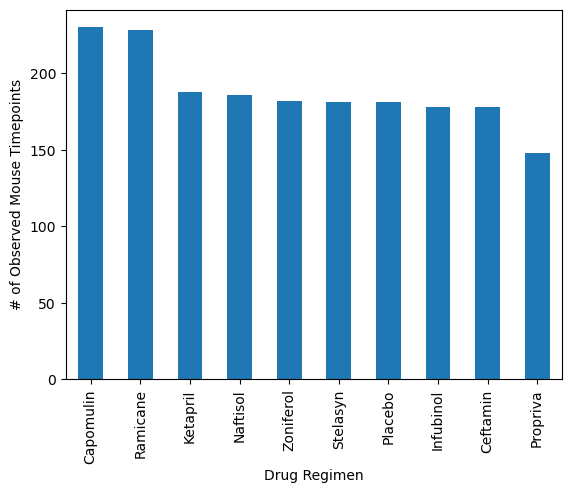

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate the count of mouse ID/Timepoints for each drug regimen
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create the bar plot
drug_regimen_counts.plot(kind="bar")
plt.title("Total Number of Mice Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Timepoints")
plt.show()

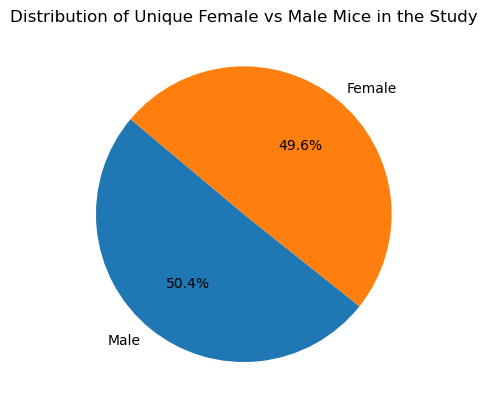

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Drop duplicates to get unique mice
unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])

# Count the number of unique male and female mice
gender_counts = unique_mice["Sex"].value_counts()

# Create the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Unique Female vs Male Mice in the Study")
plt.ylabel("")  # Hide the y-label for better aesthetics
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [84]:
# Filter the data for the specific drug regimens
selected_regimens = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Get the last (greatest) timepoint for each mouse
max_timepoints = selected_regimens.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, selected_regimens, on=["Mouse ID", "Timepoint"], how="left")

# Preview the resulting DataFrame
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [86]:
# List of treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to hold tumor volumes for each treatment regimen
tumor_vol_data = {treatment: [] for treatment in treatments}

# Loop through each treatment to calculate the IQR and determine outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append the data to the list
    tumor_vol_data[treatment] = treatment_data.tolist()
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify any outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


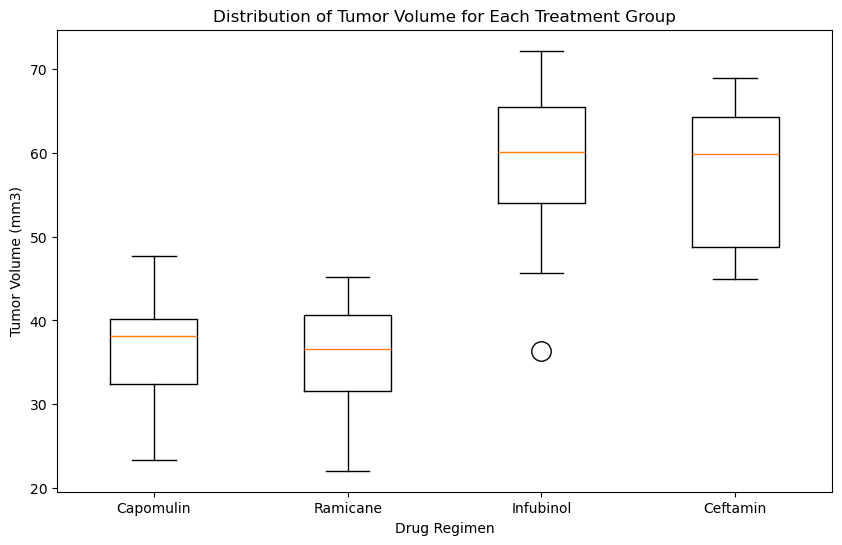

In [159]:
# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([tumor_vol_data[treatment] for treatment in treatments], labels=treatments, flierprops=dict(marker='o', color='red', markersize=14))
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

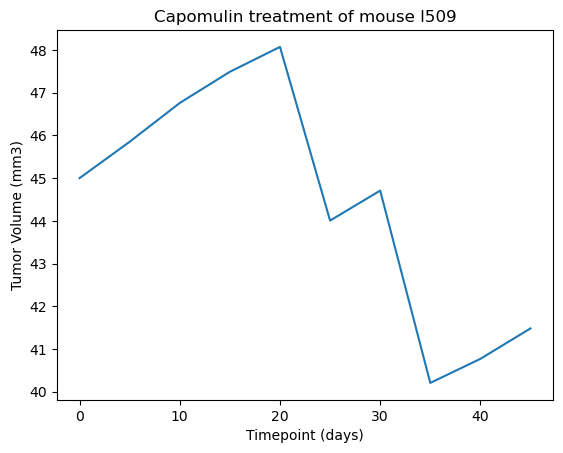

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


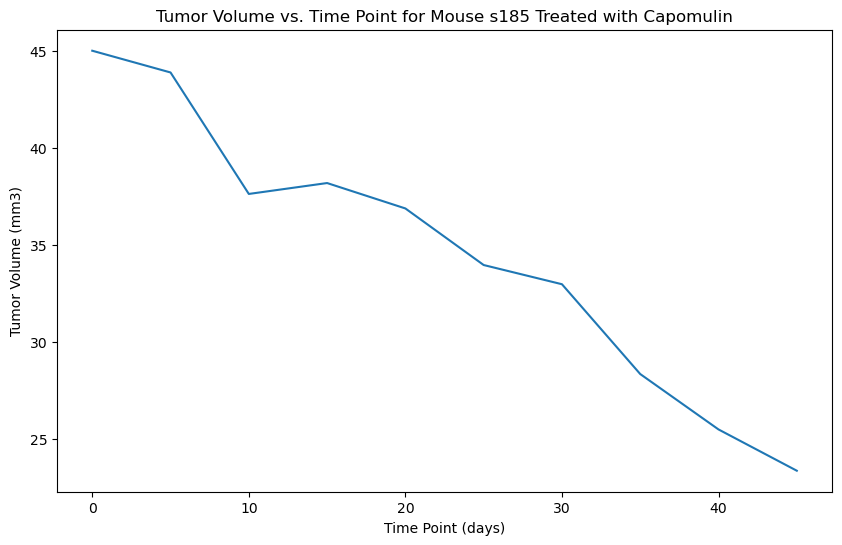

In [165]:
# Select a single mouse treated with Capomulin
mouse_id = capomulin_data["Mouse ID"].iloc[0]

# Filter the data for this mouse
single_mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == "Capomulin")]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

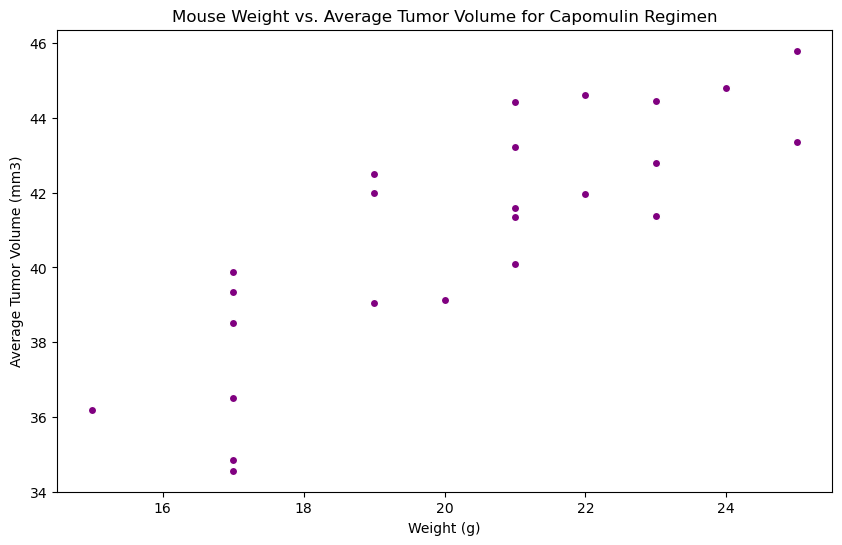

In [167]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
capomulin_avg_tumor_vol = capomulin_data.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
})

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"], c='purple', edgecolors='w')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694721


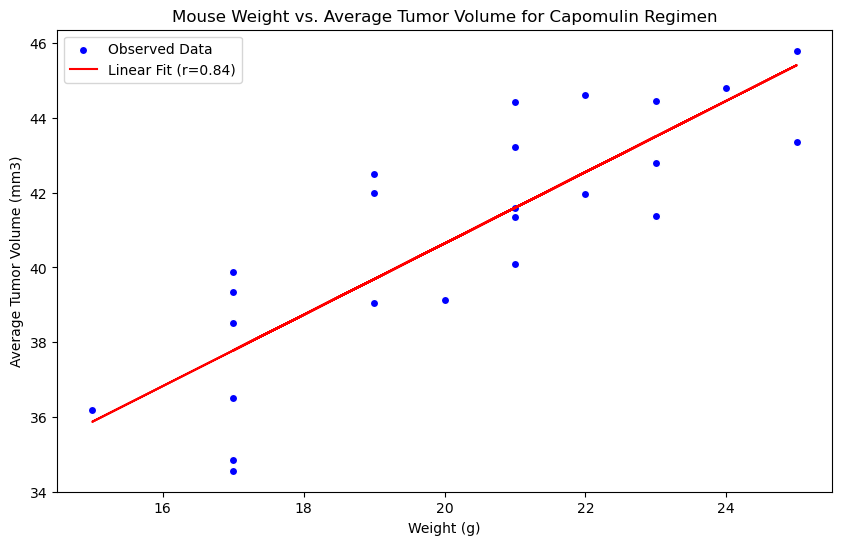

Slope: 0.9544396890241049, Intercept: 21.552160532685008, R-squared: 0.7088568047708723, P-value: 1.3225722434712404e-07


In [123]:
# Calculate the correlation coefficient and a linear regression model
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation, _ = pearsonr(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])
print(f"Correlation coefficient: {correlation}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])

# Generate the line of best fit
regress_values = capomulin_avg_tumor_vol["Weight (g)"] * slope + intercept

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"], c='blue', edgecolors='w', label="Observed Data")
plt.plot(capomulin_avg_tumor_vol["Weight (g)"], regress_values, color='red', label=f'Linear Fit (r={r_value:.2f})')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()

print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}")